In [1]:
import pandas as pd
import numpy as np
import uproot
from glob import glob
import matplotlib.pyplot as plt

In [2]:
ls samples/electroweak_vbf_zjets/

ZjetOmnifold_Aug17_Herwig7_ZmmjjEW_mc16a.root
ZjetOmnifold_Aug17_Herwig7_ZmmjjEW_mc16d.root
ZjetOmnifold_Aug17_Herwig7_ZmmjjEW_mc16e.root


In [3]:
[file for file in glob("samples/electroweak_vbf_zjets/*.root")]

['samples/electroweak_vbf_zjets/ZjetOmnifold_Aug17_Herwig7_ZmmjjEW_mc16a.root',
 'samples/electroweak_vbf_zjets/ZjetOmnifold_Aug17_Herwig7_ZmmjjEW_mc16d.root',
 'samples/electroweak_vbf_zjets/ZjetOmnifold_Aug17_Herwig7_ZmmjjEW_mc16e.root']

In [4]:
f = uproot.open('samples/electroweak_vbf_zjets/ZjetOmnifold_Aug17_Herwig7_ZmmjjEW_mc16a.root')

In [5]:
columns = f['EventTree'].keys()

In [6]:
# columns

In [7]:
a = f['EventTree'].arrays()

In [8]:
np.asarray(a['mu'])

array([24.5, 18.5, 27.5, ..., 36.5, 23.5, 22.5], dtype=float32)

In [9]:
np.asarray(a['EventNumber'])

array([140757, 140871, 141602, ..., 692647, 628936, 207349], dtype=int32)

In [10]:
cols = [col for col in columns if not col.endswith("tracks")]
arrays = [a[col] for col in cols]

In [11]:
df = pd.DataFrame.from_dict(dict(zip(cols, arrays)))

In [12]:
df

,TruthCutFlow,mcChannelNumber,CutFlow,EventNumber,RunNumber,LumiBlock,BCID,NPV,initialWeight,pileupWeight,...,truth_Dphi_j1_ll,truth_R_DB,truth_y_llj,truth_pT_llj,truth_N_stbl,truth_Nconst_j1,truth_stblM,truth_j1_DRmin_anyReco,truth_j1_DRmin_jvtReco,truth_j1_DR_reco_j1
0,7,830007,13,140757,300687,25,2113,12,0.005010,1.162800,...,2.889913,1.691254,0.626161,203.606873,346,16,13000.0,0.005122,0.005122,0.005122
1,6,830007,12,140871,302393,19,1547,12,0.001147,1.083530,...,2.419132,2.713886,0.693207,488.719086,410,43,13000.0,0.006678,0.006678,3.252800
2,7,830007,13,141602,306269,28,2657,15,0.001827,1.022078,...,2.145233,2.023071,0.261075,521.594788,241,58,13000.0,0.001612,0.001612,0.001612
3,7,830007,13,141367,311481,20,2229,7,0.008478,1.025579,...,2.731432,1.754390,1.015143,189.060699,411,33,13000.0,0.005777,0.005777,0.005777
4,7,830007,13,141831,303338,15,1873,10,0.010230,1.116030,...,2.529951,1.226460,-0.463334,179.255829,472,20,13000.0,0.004479,0.004479,0.004479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217217,7,830007,8,693783,305571,32,2502,18,0.001208,0.846699,...,3.110298,1.616384,0.986045,384.279022,600,29,13000.0,0.006284,0.006284,0.006284
217218,7,830007,13,692153,301932,17,2088,14,0.002728,1.094801,...,3.082352,1.108196,-0.169797,101.461075,408,31,13000.0,0.003034,0.003034,0.003034
217219,7,830007,13,692647,309516,37,357,21,0.042416,0.705847,...,2.760660,0.953999,1.371772,65.348778,368,19,13000.0,0.006638,0.006638,0.006638
217220,6,830007,12,628936,311402,24,184,16,0.007211,1.039691,...,2.898484,0.600040,0.558809,248.974915,231,25,13000.0,0.006216,0.006216,0.006216


(array([ 1055.,   872., 18596., 31309., 41400., 52810., 36003., 27271.,
         6797.,  1109.]),
 array([ 0.5,  4.9,  9.3, 13.7, 18.1, 22.5, 26.9, 31.3, 35.7, 40.1, 44.5],
       dtype=float32),
 <BarContainer object of 10 artists>)

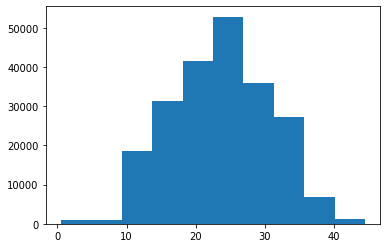

In [13]:
plt.hist(df.mu)